In [10]:
import pathlib

import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
import statsmodels.formula.api as smf

sns.set()

We begin by reading the data and summarizing the variables.

In [11]:
path = pathlib.Path.home() / 'data' / 'sleuth3' / 'case0701.csv'
df = pd.read_csv(path)
df.head()

,Velocity,Distance
0,170,0.03
1,290,0.03
2,-130,0.21
3,-70,0.26
4,-185,0.28


In [12]:
summary = df.describe()
summary

,Velocity,Distance
count,24.000000,24.000000
mean,373.125000,0.911250
std,371.254666,0.645744
min,-220.000000,0.030000
25%,165.000000,0.407500
50%,295.000000,0.900000
75%,537.500000,1.175000
max,1090.000000,2.000000


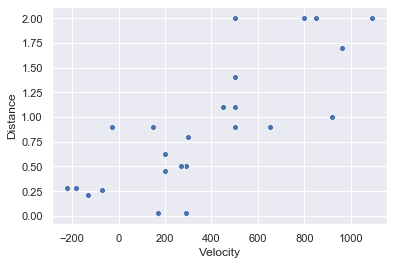

In [22]:
sns.scatterplot(x='Velocity', y='Distance', data=df)

# Does Hubble's Data Support the Big Bang Theory? (Test that $\beta_0$ is 0)

According to the theory discussed in Section 7.1.1 of The Statistical Sleuth, the true distance of the nebulae from earth is a constant times the recession velocity, so, if $Y$ is measured distance, $\mu\{Y|X\} = \beta_1X$.  Thus, if the simple theory is right, the linear regression of measured distance on velocity will have intercept 0.  Since the relationship does indeed appear to be a straight line, a check on the theory is accomplished by a test that $\beta_0$ is 0.  From the statsmodels summary below, the two-sided $p$-value for this test is reported as 0.003, providing evidence that these data do not support the theory as stated.

In [24]:
model = sm.ols('Distance ~ Velocity', df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Distance   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     36.29
Date:                Sat, 31 Aug 2019   Prob (F-statistic):           4.61e-06
Time:                        11:03:35   Log-Likelihood:                -11.355
No. Observations:                  24   AIC:                             26.71
Df Residuals:                      22   BIC:                             29.07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3992      0.119      3.364      0.003       0.153       0.645
Velocity       0.0014      0.000      6.024      0.000       0.001       0.002
==============================================================================
Omnibus:                        0.298   Durbin-Watson:                   1.377
Prob(Omnibus):                  0.862   Jarque-Bera (JB):                0.030
Skew:                           0.083   Prob(JB):                        0.985
Kurtosis:                       2.958   Cond. No.                         747.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
np.sqrt(results.mse_resid)

0.4056302108254552

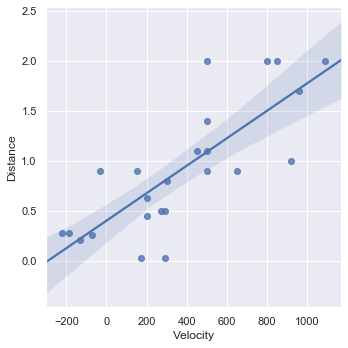

In [29]:
sns.lmplot(x='Velocity', y='Distance', data=df)

# What is the Age of the Universe According to the Big Bang Theory (Confidence interval for $\beta_1$)

According to the Big Bang theory, $\mu\{Y|X\} = \beta_1X$, and $\beta_1$ is the age of the universe.  A least squares fit to the Big Bang model without the intercept parameter gives an estimate for $\beta_1$ of 0.001922 megaparsec-second per km, with a standard error of 1.91e-4 based upon 23 degrees of freedom.  Since $t_{23}(0.975) = 2.069$, the confidence interval for $\beta_1$ is 1.922e-3$\pm$(2.069)(1.91e-4), or from 1.526e-3 to 2.317e-3 megaparsec-second per km, or 1.491 to 2.264 billion years (one megaparsec-second per km is about 977.3 billion years).  The best estimate is 1.88 billion years.

In [26]:
model = sm.ols('Distance ~ Velocity - 1', df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               Distance   R-squared (uncentered):                   0.814
Model:                            OLS   Adj. R-squared (uncentered):              0.806
Method:                 Least Squares   F-statistic:                              100.9
Date:                Sat, 31 Aug 2019   Prob (F-statistic):                    7.05e-10
Time:                        11:03:39   Log-Likelihood:                         -16.335
No. Observations:                  24   AIC:                                      34.67
Df Residuals:                      23   BIC:                                      35.85
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Velocity       0.0019      0.000     10.043      0.000       0.002       0.002
==============================================================================
Omnibus:                        0.091   Durbin-Watson:                   1.702
Prob(Omnibus):                  0.955   Jarque-Bera (JB):                0.190
Skew:                          -0.124   Prob(JB):                        0.909
Kurtosis:                       2.642   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
results.bse

Velocity    0.000191
dtype: float64

In [28]:
interval = scipy.stats.t.interval(0.95, 23, loc=results.params['Velocity'], scale=results.bse['Velocity']) 
mult = 1e6 * 3.26 * 9.46e12 / (86400 * 365.2425) / 1e9 
[i * mult for i in interval]

[1.4909306523533459, 2.2644692707362593]